In [1]:
import numpy as np
colors = np.random.rand(100)


In [2]:
import pandas as pd

x=pd.read_pickle('/mnt/data/deka01/debug_OpenPCDet/tools/featbank_gaussian.pkl')

In [30]:
import torch
import matplotlib.pyplot as plt

In [145]:
x.keys()

dict_keys(['Car_cls', 'Ped_cls', 'Cyc_cls', 'Car_reg', 'Car_sh', 'Ped_reg', 'Ped_sh', 'Cyc_reg', 'Cyc_sh'])

In [146]:
len(x['Car_sh'])
class_list = []

In [147]:
class_list.append(torch.stack(x['Car_sh']))
class_list.append(torch.stack(x['Ped_sh']))
class_list.append(torch.stack(x['Cyc_sh']))

In [150]:
means = []
stds = []
for i in range(0,len(class_list)):
    means.append(torch.mean(class_list[i], dim=0))
    stds.append(torch.std(class_list[i], dim=0))

In [161]:
import pickle

# create a dictionary containing values to be written to the file
values_dict = {'mean': means, 'std': stds}

# open the file in binary mode and write the dictionary to it
with open('/mnt/data/deka01/debug_OpenPCDet/tools/dist.pkl', 'wb') as f:
    pickle.dump(values_dict, f)

In [5]:
y = pd.read_pickle('/mnt/data/deka01/debug_OpenPCDet/tools/trial_3.pkl')

In [6]:
y_ens = y['ens']
y_ens[0].keys()

dict_keys(['rcnn_sh_fg_mean', 'rcnn_sh_uc_mean', 'rcnn_sh_bg_mean', 'rcnn_sh_fg_mean_Car', 'rcnn_sh_fg_mean_Ped', 'rcnn_sh_fg_mean_Cyc', 'rcnn_sh_uc_mean_Car', 'rcnn_sh_uc_mean_Ped', 'rcnn_sh_uc_mean_Cyc', 'rcnn_sh_bg_mean_Ped', 'rcnn_sh_bg_mean_Cyc', 'rcnn_sh_bg_mean_Car', 'rcnn_sh_template_fg', 'rcnn_sh_template_bg', 'rcnn_sh_template_uc'])

In [20]:
fg=[]
fg_Car = []
fg_Ped = []
fg_Cyc = []
for i,val in enumerate(x_ens):
    fg.append(x_ens[i])
    

In [21]:
len(fg)

480

In [22]:
fg[0]['rcnn_sh_fg_mean']

[tensor([[0.8855, 0.7430, 0.5840, 0.6697, 0.6750]], device='cuda:0'),
 tensor([nan], device='cuda:0'),
 tensor([nan], device='cuda:0'),
 tensor([[0.9362, 0.6159]], device='cuda:0'),
 tensor([nan], device='cuda:0'),
 tensor([nan], device='cuda:0'),
 tensor([nan], device='cuda:0'),
 tensor([nan], device='cuda:0'),
 tensor([nan], device='cuda:0'),
 tensor([nan], device='cuda:0'),
 tensor([[0.7293]], device='cuda:0'),
 tensor([nan], device='cuda:0'),
 tensor([nan], device='cuda:0'),
 tensor([[0.4983, 0.3726]], device='cuda:0'),
 tensor([[0.9205, 0.7366]], device='cuda:0'),
 tensor([[0.9586, 0.9273, 0.6185]], device='cuda:0'),
 tensor([nan], device='cuda:0'),
 tensor([nan], device='cuda:0'),
 tensor([nan], device='cuda:0'),
 tensor([nan], device='cuda:0'),
 tensor([[0.4026, 0.3602]], device='cuda:0'),
 tensor([[0.9524, 0.9324, 0.8593, 0.8019, 0.7792, 0.7245]], device='cuda:0'),
 tensor([nan], device='cuda:0'),
 tensor([nan], device='cuda:0'),
 tensor([[0.9174, 0.4845, 0.8421]], device='cuda

In [8]:
fg[0]['3diou_fg']

[tensor([0.7656, 0.8142, 0.7244, 0.7194, 0.7251], device='cuda:0'),
 tensor([nan], device='cuda:0'),
 tensor([nan], device='cuda:0'),
 tensor([0.8482, 0.7006], device='cuda:0'),
 tensor([nan], device='cuda:0'),
 tensor([nan], device='cuda:0'),
 tensor([nan], device='cuda:0'),
 tensor([nan], device='cuda:0'),
 tensor([nan], device='cuda:0'),
 tensor([nan], device='cuda:0'),
 tensor([0.5797], device='cuda:0'),
 tensor([nan], device='cuda:0'),
 tensor([nan], device='cuda:0'),
 tensor([0.6049, 0.6469], device='cuda:0'),
 tensor([0.7724, 0.6341], device='cuda:0'),
 tensor([0.7855, 0.8076, 0.7000], device='cuda:0'),
 tensor([nan], device='cuda:0'),
 tensor([nan], device='cuda:0'),
 tensor([nan], device='cuda:0'),
 tensor([nan], device='cuda:0'),
 tensor([0.5772, 0.5913], device='cuda:0'),
 tensor([0.8429, 0.7611, 0.8186, 0.8153, 0.7402, 0.7991], device='cuda:0'),
 tensor([nan], device='cuda:0'),
 tensor([nan], device='cuda:0'),
 tensor([0.8638, 0.7253, 0.8095], device='cuda:0'),
 tensor([nan

In [23]:
import torch

In [24]:
def convert_to_tensors(fg,fg_key,gt_key):
    fg_Car = []
    fg_Ped = []
    fg_Cyc = []
    gt_Car = []
    gt_Ped = []
    gt_Cyc = []
    for value in fg:    
        values= value[fg_key]
        values_gt = value[gt_key]
        for j in range(0,len(values),3):
            for k in range(j,j+3):
                if len(values[k].shape) > 1:
                    values[k] = values[k].squeeze(0) 
            fg_Car.extend(values[j])
            fg_Ped.extend(values[j+1])
            fg_Cyc.extend(values[j+2])
            gt_Car.extend(values_gt[j])
            gt_Ped.extend(values_gt[j+1])
            gt_Cyc.extend(values_gt[j+2])
    Car_Fg = torch.stack(fg_Car)
    Ped_Fg = torch.stack(fg_Ped)
    Cyc_Fg = torch.stack(fg_Cyc)
    Car_gt = torch.stack(gt_Car)
    Ped_gt = torch.stack(gt_Ped)
    Cyc_gt = torch.stack(gt_Cyc)
    ensemble = [Car_Fg,Ped_Fg,Cyc_Fg]
    ensemble_gt = [Car_gt,Ped_gt,Cyc_gt]
    for i,entries in enumerate(ensemble):
        mask = ~torch.isnan(entries)
        ensemble[i] = entries[mask]

    for i,entries in enumerate(ensemble_gt):
        mask = ~torch.isnan(entries)
        ensemble_gt[i] = entries[mask]
    return ensemble,ensemble_gt

In [27]:
def extract_values(fg,fg_key):
    fg_Car = []
    fg_Ped = []
    fg_Cyc = []

    for value in fg:    
        values= value[fg_key]


        for j in range(0,len(values),3):
            for k in range(j,j+3):
                if len(values[k].shape) > 1:
                    values[k] = values[k].squeeze(0) 
            fg_Car.extend(values[j])
            fg_Ped.extend(values[j+1])
            fg_Cyc.extend(values[j+2])

    Car_Fg = torch.stack(fg_Car)
    Ped_Fg = torch.stack(fg_Ped)
    Cyc_Fg = torch.stack(fg_Cyc)

    ensemble = [Car_Fg,Ped_Fg,Cyc_Fg]

    for i,entries in enumerate(ensemble):
        mask = ~torch.isnan(entries)
        ensemble[i] = entries[mask]

    return ensemble

In [28]:
ensemble,ensemble_gt = convert_to_tensors(fg,'rcnn_sh_fg_mean','3diou_fg')
ensemble_uc,ensemble_gt_uc = convert_to_tensors(fg,'rcnn_sh_uc_mean','3diou_uc')
ensemble_bg,ensemble_gt_bg = convert_to_tensors(fg,'rcnn_sh_bg_mean','3diou_bg')

In [26]:
iou_pl_fg = extract_values(fg,'3dioupl_fg')
iou_pl_uc = extract_values(fg,'3dioupl_uc')
iou_pl_bg = extract_values(fg,'3dioupl_bg')


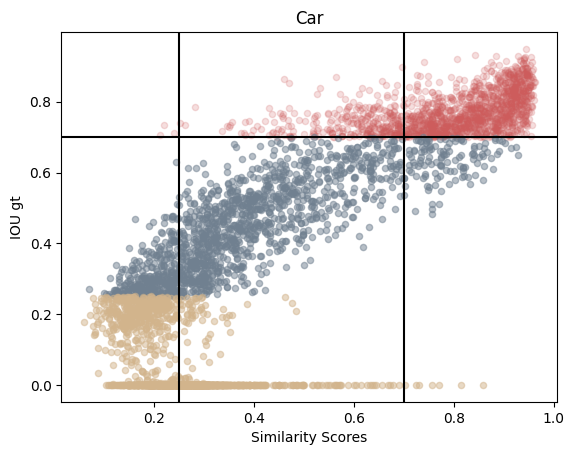

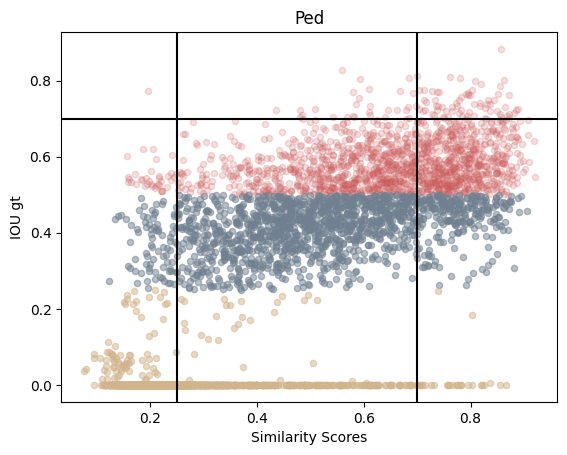

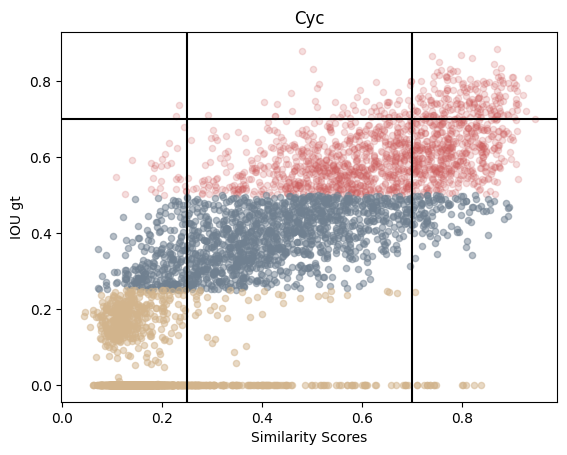

In [31]:
import matplotlib.pyplot as plt
classes = ['Car','Ped','Cyc']
thresh = [[0.25,0.70,0.70],[0.25,0.70,0.70],[0.25,0.70,0.70]]
for i,cls in enumerate(classes):
    plt.scatter(ensemble[i].cpu().numpy()[-1500:],ensemble_gt[i].cpu().numpy()[-1500:],s=20,color='indianred',alpha=0.2)
    plt.scatter(ensemble_uc[i].cpu().numpy()[-1500:],ensemble_gt_uc[i].cpu().numpy()[-1500:],s=20,color='slategrey',alpha=0.5)
    plt.scatter(ensemble_bg[i].cpu().numpy()[-1500:],ensemble_gt_bg[i].cpu().numpy()[-1500:],s=20,color='tan',alpha=0.5)
    plt.axvline(x=thresh[i][0],c='black')
    plt.axvline(x=thresh[i][1],c='black')
    plt.axhline(y=thresh[i][2],c='black')
    plt.xlabel('Similarity Scores')
    plt.ylabel('IOU gt')
    plt.title(cls)
    plt.show()


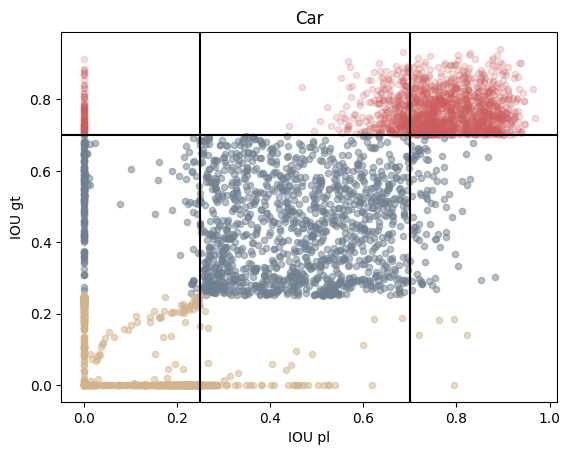

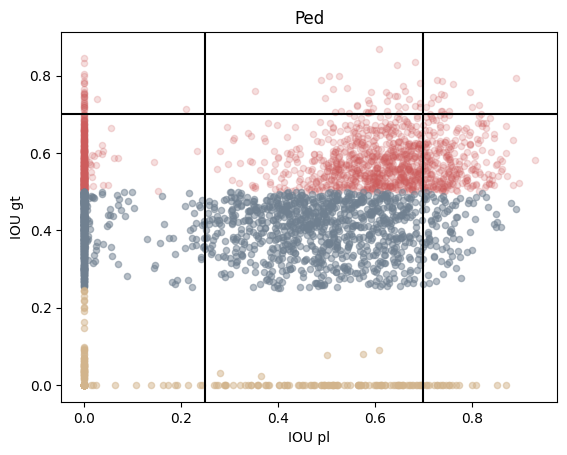

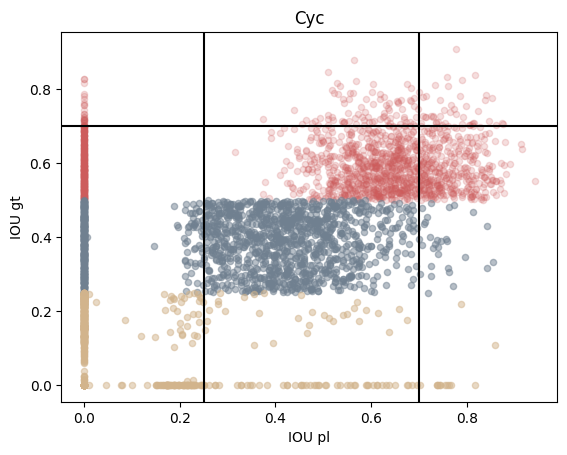

In [35]:

classes = ['Car','Ped','Cyc']
for i,cls in enumerate(classes):

    plt.scatter(iou_pl_fg[i].cpu().numpy()[-1500:],ensemble_gt[i].cpu().numpy()[-3500:-2000],s=20,color='indianred',alpha=0.2)
    plt.scatter(iou_pl_uc[i].cpu().numpy()[-1500:],ensemble_gt_uc[i].cpu().numpy()[-3500:-2000],s=20,color='slategrey',alpha=0.5)
    plt.scatter(iou_pl_bg[i].cpu().numpy()[-1500:],ensemble_gt_bg[i].cpu().numpy()[-3500:-2000],s=20,color='tan',alpha=0.5)
    plt.axvline(x=0.25,c='black')
    plt.axvline(x=0.70,c='black')
    plt.axhline(y=0.70,c='black')
    plt.xlabel('IOU pl')
    plt.ylabel('IOU gt')
    plt.title(cls)
    plt.show()

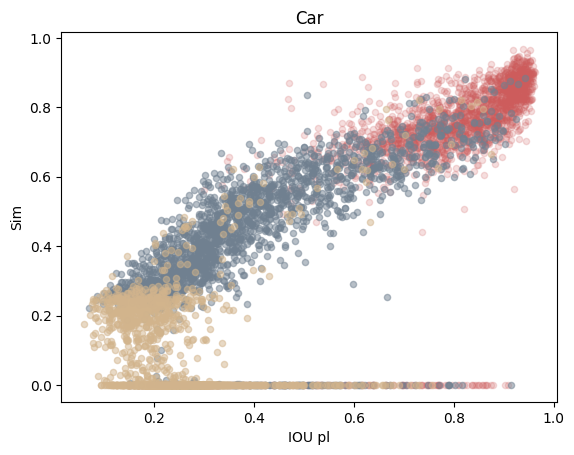

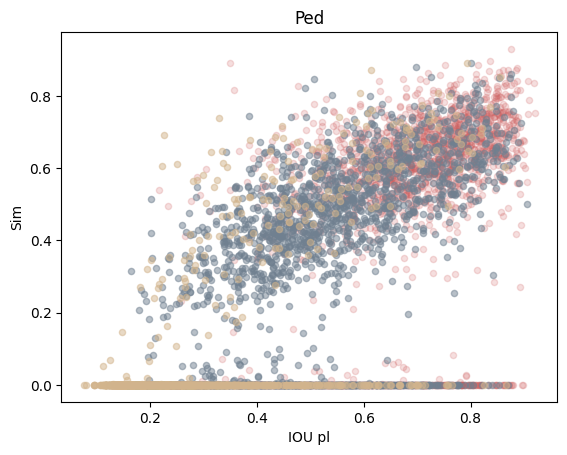

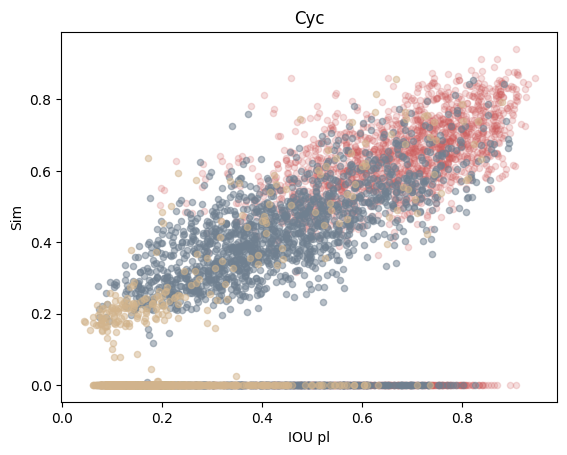

In [16]:
import matplotlib.pyplot as plt

classes = ['Car','Ped','Cyc']
for i,cls in enumerate(classes):

    plt.scatter(ensemble[i].cpu().numpy()[-2000:],iou_pl_fg[i].cpu().numpy()[-2000:],s=20,color='indianred',alpha=0.2)
    plt.scatter(ensemble_uc[i].cpu().numpy()[-2000:],iou_pl_uc[i].cpu().numpy()[-2000:],s=20,color='slategrey',alpha=0.5)
    plt.scatter(ensemble_bg[i].cpu().numpy()[-2000:],iou_pl_bg[i].cpu().numpy()[-2000:],s=20,color='tan',alpha=0.5)
    plt.xlabel('IOU pl')
    plt.ylabel('Sim')
    plt.title(cls)
    plt.show()
